## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import ascii_lowercase as letters
#file_name = '/home/francescofontana/data/data_000637.txt' #LINUX
file_name = '/Users/data_lab_LM/data_000637.txt'   #WINDOWS

import_data = pd.read_csv(file_name, header = [0,])

df=pd.DataFrame(import_data)
data=df.copy()

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [3]:
N=0
while N<1e4:
    N=np.random.randint(1,data.shape[0])
        
print('N choose randomly in range ( 10000 < N < # DATAFRAME LENGHT  ) ---> N =',N )

data.head(N)


N choose randomly in range ( 10000 < N < # DATAFRAME LENGHT  ) ---> N = 1211851


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1211846,1,1,31,3869210508,2997,9
1211847,1,0,15,3869210508,2987,13
1211848,1,0,16,3869210508,2993,20
1211849,1,0,18,3869210508,2996,19


2\. Find out the number of BX in a ORBIT (the value 'x').

In [4]:
#data['timens']=data['TDC_MEAS']*25/30
#print the Dataframe Group by 'ORBIT_CNT'

x=data['BX_COUNTER'].max()
x+=1

print('The value of X: ', x )

The value of X:  3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [5]:
print('Time to import all data from a txt file:')
%timeit pd.read_csv(file_name, header = [0,])

print('\nTime to create a DataFrame from the imported data:')
%timeit  pd.DataFrame(import_data)

print('\nTime to find the value of X (calculated on previous exercise):')
%timeit (data['BX_COUNTER'].max() +1)

Time to import all data from a txt file:
659 ms ± 36.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Time to create a DataFrame from the imported data:
2.86 µs ± 243 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Time to find the value of X (calculated on previous exercise):
2 ms ± 87.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).


In [6]:
#Assuming that the MINIMUM value of ORBIT_CNT is equal to the initial time (t=0), 
#we condider time from the minimum on.
#Each value of 'ORBIT_CNT'  is ---> data['ORBIT_CNT'] = K* ( 3654 * 25ns )
# when K is the difference from the initial time (" data['ORBIT_CNT'].min() ") and each values (" data['ORBIT_CNT'] ")

orbit_cnt_relative= data['ORBIT_CNT'] - data['ORBIT_CNT'].min()
data['time_ns']=data['TDC_MEAS']*25/30 + data['BX_COUNTER']*25 +  (orbit_cnt_relative * x )*25 

data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
0,1,0,123,3869200167,2374,26,5.937167e+04
1,1,0,124,3869200167,2374,27,5.937250e+04
2,1,0,63,3869200167,2553,28,6.384833e+04
3,1,0,64,3869200167,2558,19,6.396583e+04
4,1,0,64,3869200167,2760,25,6.902083e+04
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.804755e+08
1310716,1,1,4,3869211171,763,11,9.804755e+08
1310717,1,0,64,3869211171,764,0,9.804755e+08
1310718,1,0,139,3869211171,769,0,9.804756e+08


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [7]:
#np.random.randint( low_included , high_excluded, size, ... )
data['HEAD']=np.random.randint(0,2, size=len(data))
data


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
0,0,0,123,3869200167,2374,26,5.937167e+04
1,1,0,124,3869200167,2374,27,5.937250e+04
2,0,0,63,3869200167,2553,28,6.384833e+04
3,1,0,64,3869200167,2558,19,6.396583e+04
4,1,0,64,3869200167,2760,25,6.902083e+04
...,...,...,...,...,...,...,...
1310715,0,0,62,3869211171,762,14,9.804755e+08
1310716,1,1,4,3869211171,763,11,9.804755e+08
1310717,1,0,64,3869211171,764,0,9.804755e+08
1310718,0,0,139,3869211171,769,0,9.804756e+08


6\. Create a new DataFrame that contains only the rows with HEAD=1.


In [8]:
data_head1=data[ data['HEAD']==1]
data_head1

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
1,1,0,124,3869200167,2374,27,5.937250e+04
3,1,0,64,3869200167,2558,19,6.396583e+04
4,1,0,64,3869200167,2760,25,6.902083e+04
5,1,0,63,3869200167,2762,4,6.905333e+04
6,1,0,61,3869200167,2772,14,6.931167e+04
...,...,...,...,...,...,...,...
1310706,1,0,28,3869211171,44,29,9.804575e+08
1310710,1,1,36,3869211171,427,13,9.804671e+08
1310711,1,1,39,3869211171,430,0,9.804672e+08
1310716,1,1,4,3869211171,763,11,9.804755e+08


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel


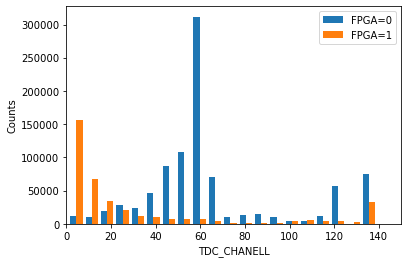

In [9]:
import matplotlib.pyplot as plt

data_fpga0= data[ data['FPGA']==0 ]
data_fpga1= data[ data['FPGA']==1 ]

plt.hist([data_fpga0['TDC_CHANNEL'],data_fpga1['TDC_CHANNEL']],bins=20)

labels=['FPGA=0','FPGA=1']

plt.xlabel('TDC_CHANELL')
plt.ylabel('Counts')
plt.xlim(0,150)

plt.legend(labels)

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)


In [10]:
x = data.groupby('TDC_CHANNEL')
noisy_channels = x.size().sort_values(ascending = False)
print('\nThe TDC_Channels with more noise are:')
noisy_channels[:3]



The TDC_Channels with more noise are:


TDC_CHANNEL
139    108059
64      66020
63      64642
dtype: int64

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [11]:
counts = len( data['ORBIT_CNT'] )


orbits = len(data [data['TDC_CHANNEL'] == 139] ['ORBIT_CNT'].unique() )

print("There are", counts, "unit orbits")
print("There are", orbits, "from TSC_CHANNEL = 139")



There are 1310720 unit orbits
There are 10976 from TSC_CHANNEL = 139
